# Using Machine Learning to Credit Scoring
#### Rafael Buck

## 1. Introduction

Banks and fintechs have a crucial role in modern economies and the people empowerment. For markets and society accelerate their activities, individuals and companies need access to credit. 

A credit score is a numerical expression based on a level analysis of a person's credit records, to represent the creditworthiness of an individual. Traditionally, a credit score was primarily based on credit report information typically sourced from credit bureaus. However, with the proliferation of data science, institutions of any size can develop their credit scoring system and sharpen them for applications to their target markets.

The goal of this analysis is to build a model that borrowers can use to help make the best financial decisions.

## 2. Business Understanding

In the calculation of loan risks, the banks have to take into account some variables: the probability of default (PD), which means that the borrower is not likely to honor its debt; the bank's exposure at default (EAD) and the loss given default (LGD). In this analysis, we will use machine learning to predicts the probability of default (PD).

So, the questions to be answared is: "*Given a loan application, will it be paid or not?*"

## 3. Data Understanding

We will use a real Dataset from __[Lending Club](https://www.lendingclub.com)__. Lending Club is a US peer-to-peer lending company, headquartered in San Francisco, California. Lending Club is the world's largest peer-to-peer lending platform. The company states that $33 billion in loans had been originated through its platform up to 31 December 2017 (https://www.lendingclub.com/info/statistics.action).

In [34]:
# TODO: import libs
import pandas as pd 
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# TODO: load dataset
loans = pd.read_csv("LoanStats_2017Q4.csv", skiprows=1, low_memory=False, infer_datetime_format = True) # Ignore the first row (is a comment)
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118650 entries, 0 to 118649
Columns: 145 entries, id to settlement_term
dtypes: float64(107), object(38)
memory usage: 131.3+ MB


In [36]:
half_count = len(loans)/2
loans = loans.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118650 entries, 0 to 118649
Columns: 102 entries, loan_amnt to debt_settlement_flag
dtypes: float64(77), object(25)
memory usage: 92.3+ MB


In [37]:
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,35000.0,35000.0,35000.0,60 months,11.99%,778.38,B,B5,Project Manager,< 1 year,...,50.0,0.0,0.0,73825.0,51125.0,33000.0,35182.0,N,Cash,N
1,6000.0,6000.0,6000.0,36 months,7.35%,186.23,A,A4,Business Development,1 year,...,50.0,0.0,0.0,42988.0,6100.0,8300.0,18388.0,N,Cash,N
2,40000.0,40000.0,40000.0,36 months,6.08%,1218.33,A,A2,Editor/Writer,< 1 year,...,0.0,0.0,0.0,596402.0,53711.0,58000.0,20902.0,N,Cash,N
3,10000.0,10000.0,10000.0,60 months,23.88%,286.99,E,E2,EMT,10+ years,...,100.0,0.0,0.0,42900.0,34122.0,27100.0,0.0,N,Cash,N
4,27000.0,27000.0,27000.0,60 months,9.93%,572.75,B,B2,Data Scientist,3 years,...,0.0,0.0,0.0,166381.0,99838.0,48500.0,113281.0,N,Cash,N


In [38]:
print(loans.iloc[0]) #print a sample

loan_amnt                                  35000
funded_amnt                                35000
funded_amnt_inv                            35000
term                                   60 months
int_rate                                  11.99%
installment                               778.38
grade                                          B
sub_grade                                     B5
emp_title                       Project Manager 
emp_length                              < 1 year
home_ownership                              RENT
annual_inc                                 65000
verification_status              Source Verified
issue_d                                 Dec-2017
loan_status                              Current
pymnt_plan                                     n
purpose                       debt_consolidation
title                         Debt consolidation
zip_code                                   926xx
addr_state                                    CA
dti                 

In [39]:
loans['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'Late (16-30 days)',
       'In Grace Period', 'Charged Off', nan], dtype=object)

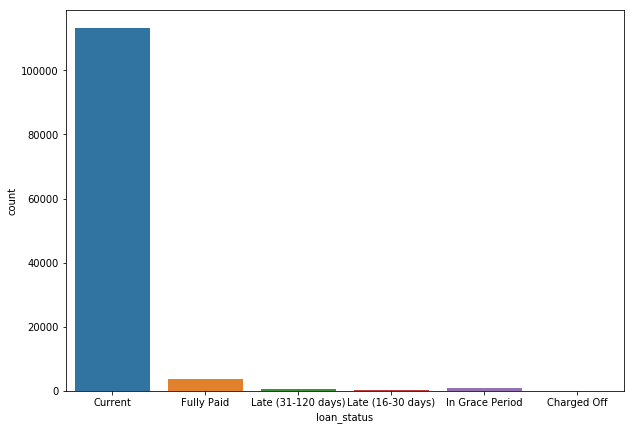

In [40]:
plt.figure(figsize = (10,7))
sns.countplot(x="loan_status", data=loans)

## 4. Data Preparation

We need to predict if a current loan will turn into overdue or not. So, lets separate all `Current` loans in a test dataset to we use later. And train our model with loans that we know that turned in overdue or not.

In [41]:
test_loans = pd.DataFrame(data = loans[loans['loan_status'] == 'Current'], copy = True) #work later (we will use it for the prediction)
loans = loans[loans['loan_status'] != 'Current'] #work only with 100% of overdue or not overdue

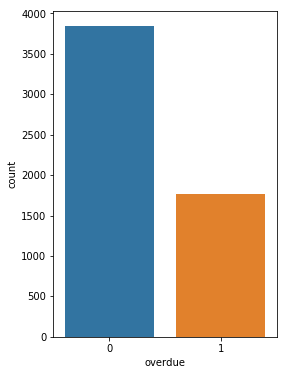

In [42]:
# TODO: find relationships, analyze outliers, and create new ones
loans['overdue'] = np.where((loans['loan_status'] == 'Fully Paid'), 
                            0,
                            1)
plt.figure(figsize = (4,6))
sns.countplot(x="overdue", data=loans)

In [43]:
overdue_percentage = 100* loans[loans["overdue"] == 1].shape[0]/loans.shape[0]
ok_percentage = 100 * loans[loans["overdue"] == 0].shape[0]/loans.shape[0]

print("Total of samples: ", loans.shape[0])
print("Non-Overdue: {:.3f}%".format(ok_percentage))
print("Overdue: {:.3f}%".format(overdue_percentage))

Total of samples:  5607
Non-Overdue: 68.539%
Overdue: 31.461%


In [ ]:
# TODO: Feature Selection

In [ ]:
# TODO: Feature Encoding

In [ ]:
# TODO: Normalization

In [ ]:
# TODO: Dimension Reduction (PCA)

## 5. Model

In [ ]:
# TODO: try feature selection, scikit-learn models

## 6. Validation

In [ ]:
# TODO: cross validation, model tuning

In [ ]:
# TODO: benchmark with 2018 Q1 (if some predicted loan of 2017Q4 closed as overdue or not in 2018Q1)

## 7. References

> Lending Club Statistics: https://www.lendingclub.com/info/download-data.action